# Bias-Variance Tradeoff

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

# allow plots to appear in the notebook
%matplotlib inline

## Training data generation
First we will write a function to generate a random sample. The data generation model:
$$ r(x) = f(x) + \epsilon $$ 
with $\epsilon ~ N(0,1)$

In [21]:
import numpy as np
import pylab as pl

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    
    x = np.linspace(0,4.5, size)
    y = 2 * np.sin(x * 1.5)
    
    return(x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    
    x = np.linspace(0,4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return(x,y)

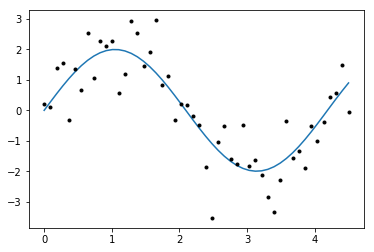

In [22]:
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

## Modeling fitting
We will use least square regression (LSR) to fit a polynomial to the data. 

In [23]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    """
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    """
    
    model = LinearRegression()
    model.fit(np.vander(x, degree+1),y)
    
    return model

def apply_polynomial(model, x):
    """
    Evaluates a linear regression model is an input sample
    model: linear regression model
    x: input sample
    """
    degree = model.coef_.size -1
    y = model.predict(np.vander(x, degree + 1))
    return y

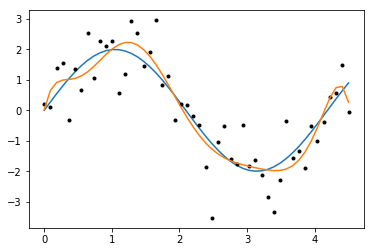

In [24]:
model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

## Model averaging
The following code generates a set of samples of the same size and fits a polynomial to each sample. Then the average model is calculated. All the models, including the average model are plotted.

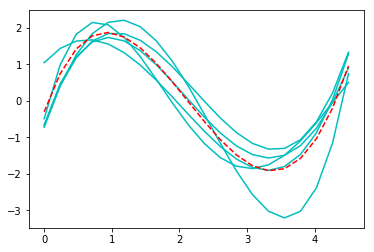

In [34]:
degree  = 4
n_samples  = 20
n_models = 5
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'c-')
avg_y = avg_y / n_models
pl.plot(x, avg_y, 'r--')

## Calculating bias and variance
Same as previous example, we generate several samples and fit a polynomial to each one. We calculate bias an variance among models for different polynomial degrees. Bias, variance and error are plotted against different degree values.

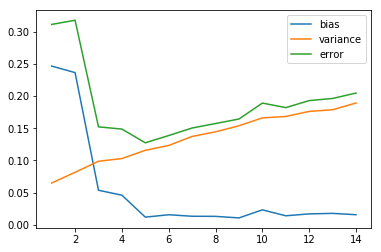

In [36]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
pl.plot(range(1, max_degree), bias_vals, label='bias')
pl.plot(range(1, max_degree), var_vals, label='variance')
pl.plot(range(1, max_degree), error_vals, label='error')
pl.legend()

* **Low bias:** the models match the data quite well
* **High variance:** the models are widely different depending on which observations happen to be available in that universe

This is the essence of the **bias-variance tradeoff**: You are seeking a model that appropriately balances bias and variance, and thus will generalize to new data (known as "out-of-sample" data).

## Cross Validation
Since in a real setup we don't have access to the real $f$ function. We cannot exactly calculate the error, hoevere we can approximate it using cross validation. We generate to samples, a training sample and a validation sample. The validation sample is use to calculate an estimation of the error.

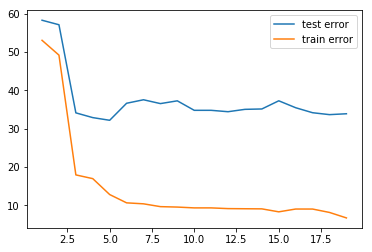

In [28]:
n_samples = 20
# train sample
train_x, train_y = sample(n_samples)
# validation sample
test_x, test_y = sample(n_samples)
max_degree = 20
test_error_vals = []
train_error_vals = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    p_y = apply_polynomial(model, train_x)
    train_error_vals.append(pl.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals.append(pl.norm(test_y - p_y)**2)
pl.plot(range(1, max_degree), test_error_vals, label='test error')
pl.plot(range(1, max_degree), train_error_vals, label='train error')
pl.legend()